# Exploratory Data Analysis

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cynthiaowens/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cynthiaowens/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Read in csvs (cleaned and pre-processed in the previous notebook) as dataframes:

In [2]:
clean = pd.read_csv('./data/reddit_clean.csv')

In [3]:
clean.head()

,body,subreddit,word_count
0,die hard trump supporter but i dont think thos...,The_Donald,13
1,His family begged them to intervene.,The_Donald,6
2,my man sitting next to trumps right is so on p...,ChapoTrapHouse,11
3,Those are good reasons. Canada is a great coun...,politics,9
4,Oy! The Father of Lies title is taken.\nour lo...,politics,22


In [5]:
extrem = pd.read_csv('./data/extreme.csv')

In [6]:
extrem.head()

,body,subreddit,word_count,tokenized,clean_content,extreme
0,die hard trump supporter but i dont think thos...,The_Donald,13,die hard trump supporter dont think videos amo...,die hard trump support dont think video amount...,1
1,His family begged them to intervene.,The_Donald,6,family begged intervene,famili beg interven,1
2,my man sitting next to trumps right is so on p...,ChapoTrapHouse,11,man sitting next trumps right point,man sit next trump right point,1
3,What a bitch,ChapoTrapHouse,3,bitch,bitch,1
4,We'll have advance notice of them planning to ...,The_Donald,28,we'll advance notice planning attack children ...,we'll advanc notic plan attack children wealth...,1


In [7]:
extrem.isna().sum()

body                0
subreddit           0
word_count          0
tokenized        9366
clean_content    9366
extreme             0
dtype: int64

## Some NAN/null values were created in the process of saving the above dataframe as a csv in the previous notebook, in the case of empty clean_content column values (as a result of the NLP preprocessing function having nothing to process, creating an empty cell).

## In running numerous 50-sample sets of these null clean_content rows I see that in every case they come from non-informative 'body' post content-- one-word answers, nonsensical posts, emojis, etc, so I'm going to delete any row with a null value. This process accidentally pinpointed almost 10,000 more non-informative, junk posts that can be removed from the dataset...

In [9]:
nulls = extrem[extrem.isna().any(axis=1)]

In [10]:
nulls.sample(50)

,body,subreddit,word_count,tokenized,clean_content,extreme
602424,It's out.,ChapoTrapHouse,2,NaN,NaN,1
563387,🤮,The_Donald,1,NaN,NaN,1
830440,☝️,The_Donald,1,NaN,NaN,1
968965,Who him is?,The_Donald,3,NaN,NaN,1
60579,;),ChapoTrapHouse,1,NaN,NaN,1
600491,* he,The_Donald,2,NaN,NaN,1
593356,😭,The_Donald,1,NaN,NaN,1
86852,😂,The_Donald,1,NaN,NaN,1
521101,👆,The_Donald,1,NaN,NaN,1
919532,🤤🤤🤤,ChapoTrapHouse,1,NaN,NaN,1


In [8]:
extrem.dropna(inplace=True)

In [9]:
extrem = extrem.reset_index(drop=True)

In [10]:
extrem.isna().sum()

body             0
subreddit        0
word_count       0
tokenized        0
clean_content    0
extreme          0
dtype: int64

In [11]:
extrem.shape

(1041125, 6)

## Get the mean word count grouped by subreddit:

In [15]:
wc = clean[['subreddit', 'word_count']]

In [16]:
wc.groupby('subreddit').mean()

,word_count
subreddit,
ChapoTrapHouse,24.492131
TheRedPill,64.823726
The_Donald,21.827968
politics,30.942441


## Get min/max information on the word count values:

In [17]:
round(clean['word_count'].describe(), 2)

count    3196580.00
mean          28.35
std           45.99
min            1.00
25%            8.00
50%           16.00
75%           32.00
max         8004.00
Name: word_count, dtype: float64

## Since the word counts range all the way up to 8,004, it is not feasible to create a visualization of word count distribution of the entire dataset. Create a sub-dataframe of observations with a word count of up to 80 and run a distribution on that instead:

In [18]:
wc_80 = wc.loc[wc['word_count'] <= 80]

In [19]:
round(wc_80['word_count'].describe(), 2)

count    2989374.00
mean          20.05
std           17.30
min            1.00
25%            7.00
50%           15.00
75%           28.00
max           80.00
Name: word_count, dtype: float64

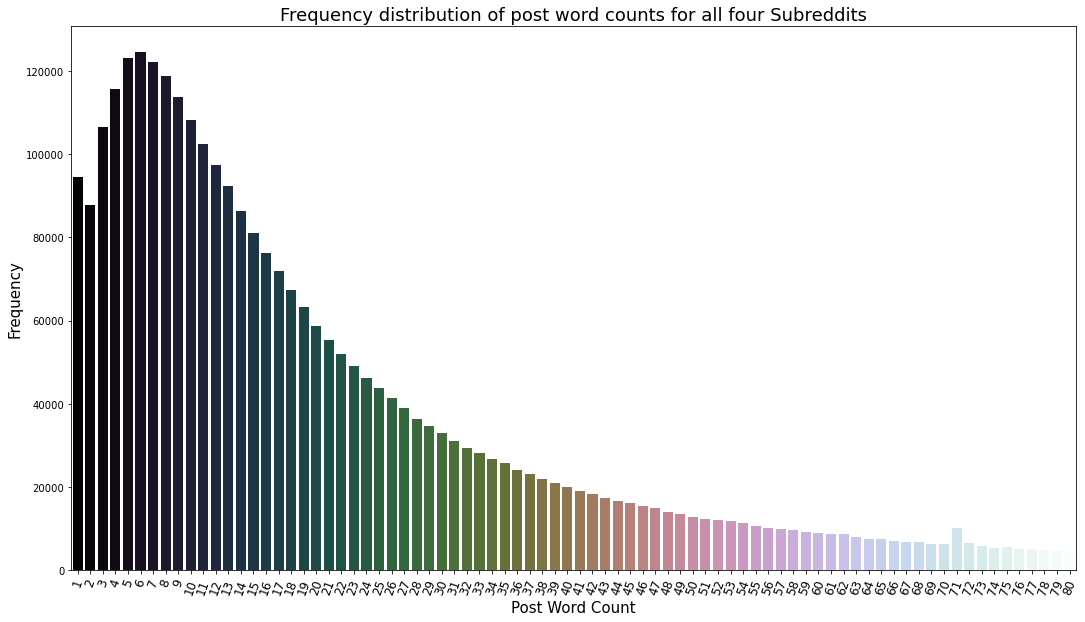

In [20]:
plt.figure(figsize=(18, 10))
sns.countplot(data=wc_80, x='word_count', palette='cubehelix')
plt.title('Frequency distribution of post word counts for all four Subreddits', fontsize = 18)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Post Word Count', fontsize = 15)
plt.xticks(fontsize = 12, rotation=70);

# from:
# Katie Sylvia BH- Linear Regression Review

## Plot the word count frequency distribution of each of the four subreddits:

In [21]:
# start with politics subreddit-

politics = clean[clean['subreddit']=='politics']
politics.reset_index(drop=True, inplace=True)

In [22]:
wc_politics = politics[['word_count']]

In [23]:
round(wc_politics.describe(), 2)

# again, in the case of each of these subreddits it is not feasible to run a visualization across 
# the entire frequency distribution because they go up to the thousands-- instead I will create a
# subset using the 75% word count to get most of the word count ranges of each subreddit in question

,word_count
count,2146083.00
mean,30.94
std,46.24
min,1.00
25%,9.00
50%,18.00
75%,36.00
max,1817.00


In [24]:
wc_politics_70 = wc_politics.loc[wc_politics['word_count'] <= 70]

In [25]:
round(wc_politics_70.describe(), 2)

,word_count
count,1939561.00
mean,20.35
std,16.05
min,1.00
25%,8.00
50%,16.00
75%,29.00
max,70.00


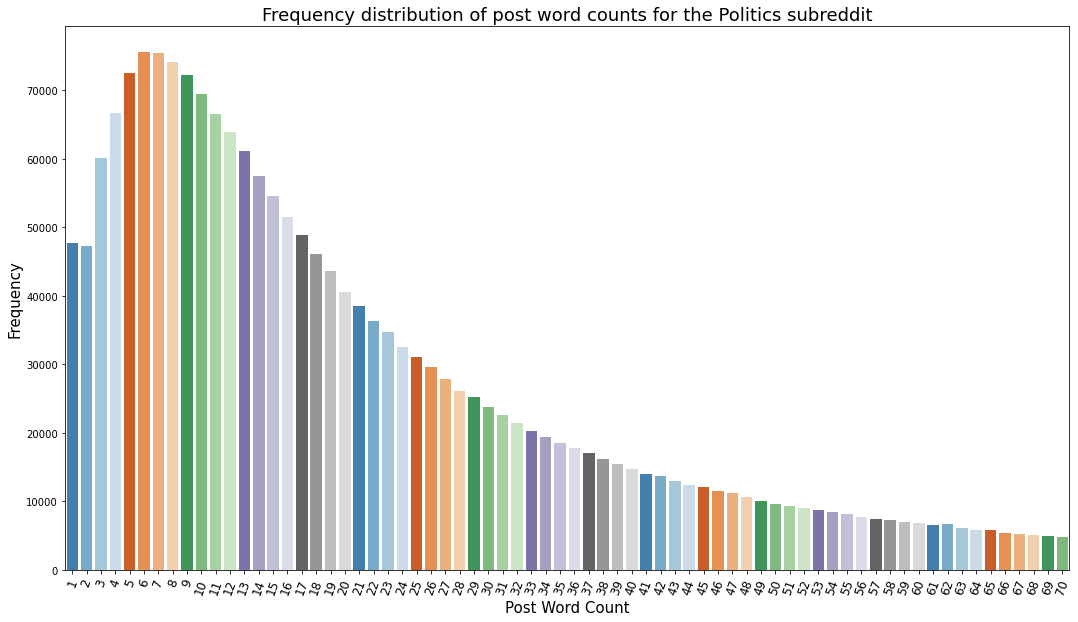

In [26]:
plt.figure(figsize=(18, 10))
sns.countplot(data=wc_politics_70, x='word_count', palette='tab20c')
plt.title('Frequency distribution of post word counts for the Politics subreddit', fontsize = 18)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Post Word Count', fontsize = 15)
plt.xticks(fontsize = 12, rotation=70);

# from:
# Katie Sylvia BH- Linear Regression Review

In [27]:
# plot the frequency distribution for The_Donald subreddit-

donald = extrem[extrem['subreddit']=='The_Donald']
donald.reset_index(drop=True, inplace=True)

In [28]:
wc_donald = donald[['word_count']]

In [29]:
round(wc_donald.describe(), 2)

,word_count
count,713662.00
mean,22.02
std,37.00
min,1.00
25%,6.00
50%,12.00
75%,25.00
max,4186.00


In [30]:
wc_donald_60 = wc_donald.loc[wc_donald['word_count'] <= 60]

In [31]:
round(wc_donald_60.describe(), 2)

,word_count
count,666437.00
mean,15.47
std,12.98
min,1.00
25%,6.00
50%,11.00
75%,21.00
max,60.00


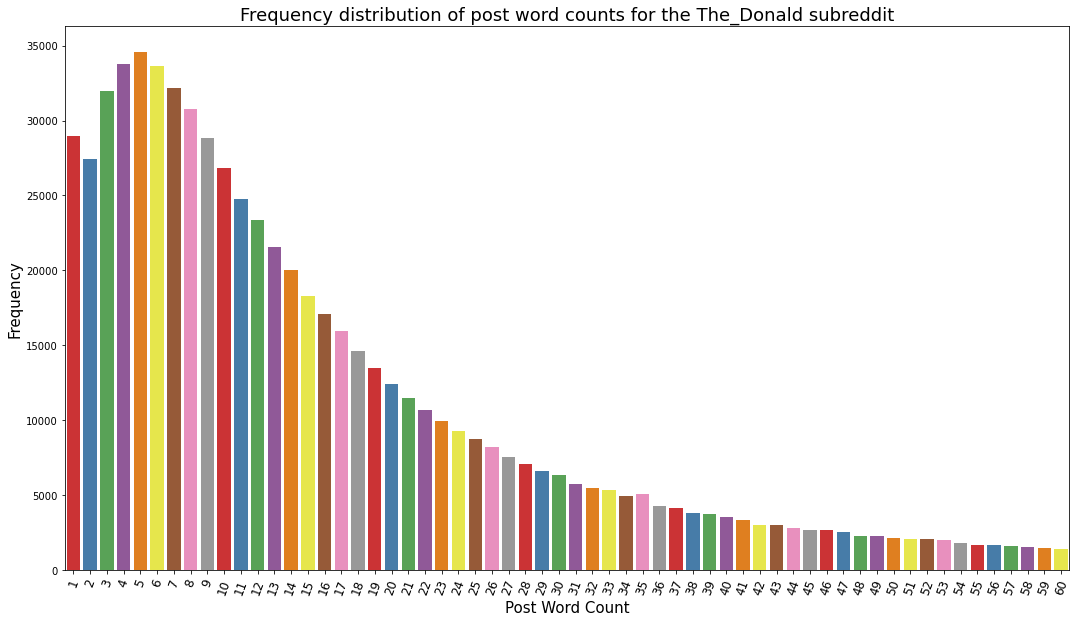

In [32]:
plt.figure(figsize=(18, 10))
sns.countplot(data=wc_donald_60, x='word_count', palette='Set1')
plt.title('Frequency distribution of post word counts for the The_Donald subreddit', fontsize = 18)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Post Word Count', fontsize = 15)
plt.xticks(fontsize = 12, rotation=70); 

# from:
# Katie Sylvia BH- Linear Regression Review

In [33]:
# TheRedPill-

redpill = extrem[extrem['subreddit']=='TheRedPill']
redpill.reset_index(drop=True, inplace=True)

In [34]:
wc_redpill = redpill[['word_count']]

In [35]:
round(wc_redpill.describe(), 2)

,word_count
count,10145.00
mean,64.85
std,131.94
min,1.00
25%,14.00
50%,30.00
75%,65.00
max,3477.00


In [36]:
wc_redpill_80 = wc_redpill.loc[wc_redpill['word_count'] <= 80]

In [37]:
round(wc_redpill_80.describe(), 2)

,word_count
count,8152.00
mean,28.11
std,19.71
min,1.00
25%,12.00
50%,22.00
75%,40.00
max,80.00


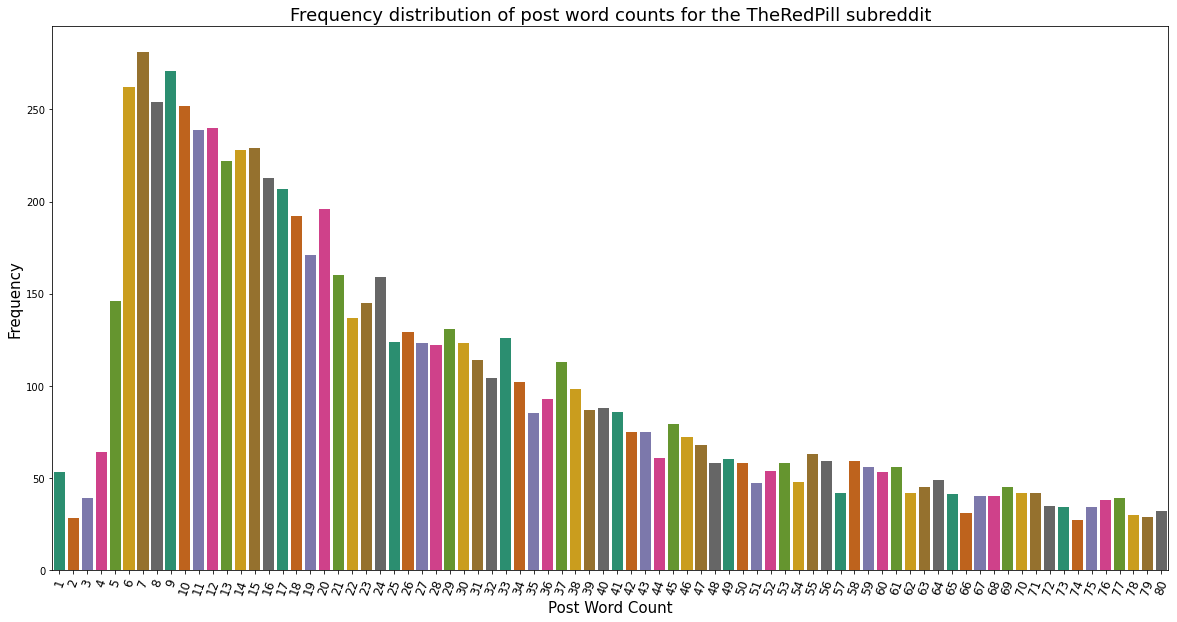

In [38]:
plt.figure(figsize=(20, 10))
sns.countplot(data=wc_redpill_80, x='word_count', palette='Dark2')
plt.title('Frequency distribution of post word counts for the TheRedPill subreddit', fontsize = 18)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Post Word Count', fontsize = 15)
plt.xticks(fontsize = 12, rotation=70); 

# from:
# Katie Sylvia BH- Linear Regression Review

In [39]:
# ChapoTrapHouse-

CTH = extrem[extrem['subreddit']=='ChapoTrapHouse']
CTH.reset_index(drop=True, inplace=True)

In [40]:
wc_CTH = CTH[['word_count']]

In [41]:
round(wc_CTH.describe(), 2)

,word_count
count,317318.00
mean,24.61
std,51.07
min,1.00
25%,6.00
50%,13.00
75%,26.00
max,7070.00


In [42]:
wc_CTH_50 = wc_CTH.loc[wc_CTH['word_count'] <= 50]

In [43]:
round(wc_CTH_50.describe(), 2)

,word_count
count,284451.00
mean,14.52
std,11.41
min,1.00
25%,6.00
50%,11.00
75%,20.00
max,50.00


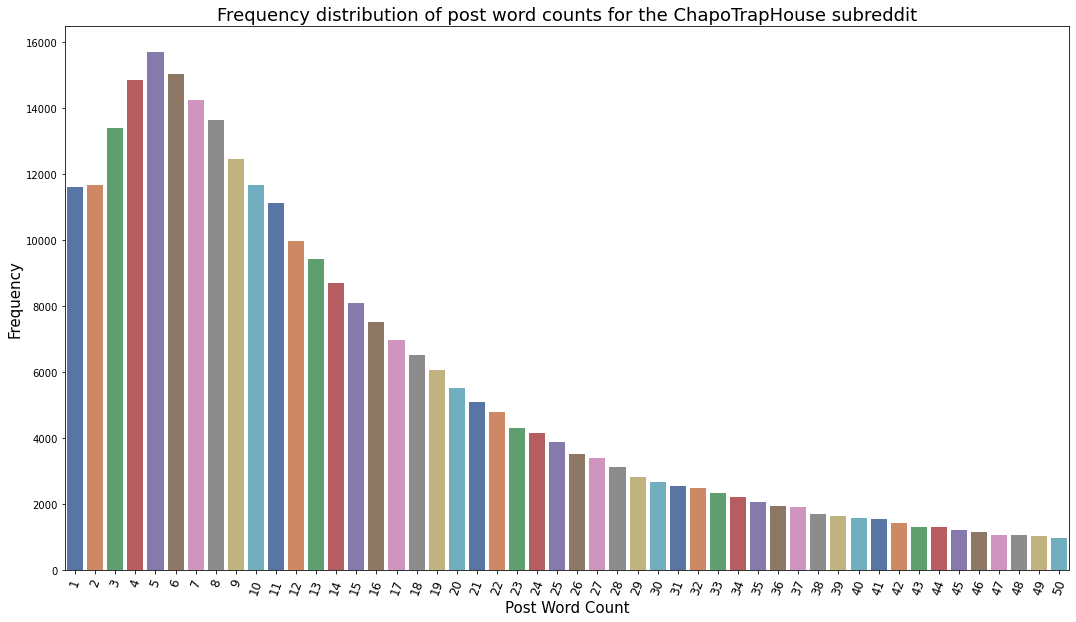

In [44]:
plt.figure(figsize=(18, 10))
sns.countplot(data=wc_CTH_50, x='word_count', palette='deep')
plt.title('Frequency distribution of post word counts for the ChapoTrapHouse subreddit', fontsize = 18)
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Post Word Count', fontsize = 15)
plt.xticks(fontsize = 12, rotation=70); 

# from:
# Katie Sylvia BH- Linear Regression Review

## Get the distribution frequency of the word counts for each subreddit:

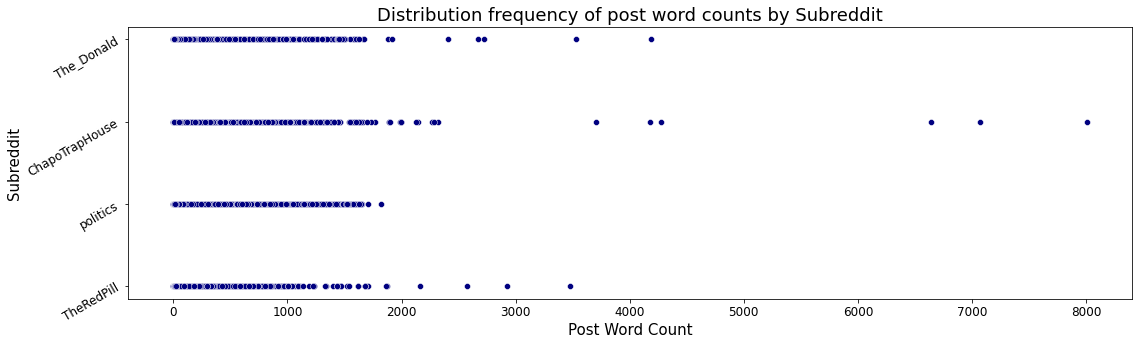

In [45]:
plt.figure(figsize=(18, 5))
sns.scatterplot(data=wc, x='word_count', y='subreddit', color='navy')
plt.title('Distribution frequency of post word counts by Subreddit', fontsize = 18)
plt.xlabel('Post Word Count', fontsize = 15)
plt.ylabel('Subreddit', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12, rotation=30);

## The bulk of non-outlying word count frequencies are very similar across the four subreddits, just under 2_000 words.

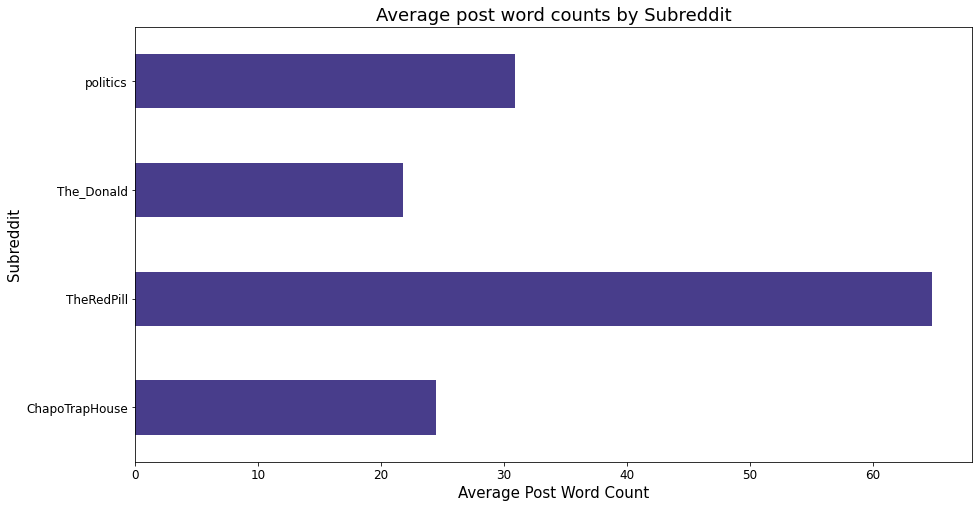

In [46]:
plt.figure(figsize=(15, 8))
wc.groupby('subreddit')['word_count'].mean().plot(kind = 'barh', color='darkslateblue')
plt.title('Average post word counts by Subreddit', fontsize = 18)
plt.xlabel('Average Post Word Count', fontsize = 15)
plt.ylabel('Subreddit', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

## No real patterns of average word counts between extremist and non-extremist posts.

## Get some visualizations of the most frequently occurring words in each extremist subreddit:

## Initialize a count vectorizer transformer, set with max features at 1_000 (the 1_000 most frequent terms in the corpus) and ngram range accepting unigrams only:

In [48]:
cvec = CountVectorizer(max_features=1_000, ngram_range=(1,1))

## Run the processed post content of the extremist subreddits through the cvec:

In [49]:
content = extrem['clean_content']

In [50]:
extrem_full_cvc = cvec.fit_transform(content)

In [51]:
extrem_full_cvc.shape

(1041125, 1000)

In [52]:
# turn back into a df-

extrem_full_cvc_df = pd.DataFrame(extrem_full_cvc.toarray(), columns = cvec.get_feature_names_out())

## Get a list of the fifty most frequent words in the combined extremist dataset (from The_Donald, TheRedPill and ChapoTrapHouse):

In [53]:
extrem_full_cvc_df.sum().nlargest(50)

like      123514
peopl     101931
get        91277
one        72147
fuck       71067
would      70426
trump      68192
go         66489
think      64380
make       56389
say        54613
know       54563
http       51020
time       50413
want       49613
even       48967
right      46759
good       45914
thing      43149
us         42323
need       40870
see        40805
look       40005
shit       39932
year       37443
use        36730
work       35510
that       35127
way        34486
realli     34343
take       34223
also       34105
actual     33339
com        33015
vote       30369
never      30322
tri        30233
still      29681
much       29499
state      28696
well       28511
call       27984
mean       27791
could      27562
got        27401
back       26578
they       26440
guy        26244
come       25631
post       25081
dtype: int64

In [54]:
# create a custom stopword list to filter out uninformative word features-

stopwords = ['get', 'would', 'go', 'make', 'http', 'even', 'use', 'that', 'also', 'com', 'tri', 'still', 'much', 'could', 'got', 'they', 'post']

# did this a few times to ID common low- or no-information words in the corpus, adding to the custom
# stopword list each time

In [55]:
# revise the cvec with this new stopword list-

cvec_stopped = CountVectorizer(max_features=1_000, ngram_range=(1,1), stop_words=stopwords)

In [56]:
# re-run with the new cvec and re-transform into a df-

extrem_full_cvc = cvec_stopped.fit_transform(content)

In [57]:
extrem_full_cvc_df = pd.DataFrame(extrem_full_cvc.toarray(), columns = cvec_stopped.get_feature_names_out())

## Top twenty most frequent words in the extremist dataset after uninformative words have been removed:

In [58]:
extrem_full_cvc_df.sum().nlargest(20)

# ok, still not that informative...

like     123514
peopl    101931
one       72147
fuck      71067
trump     68192
think     64380
say       54613
know      54563
time      50413
want      49613
right     46759
good      45914
thing     43149
us        42323
need      40870
see       40805
look      40005
shit      39932
year      37443
work      35510
dtype: int64

## Plot it:

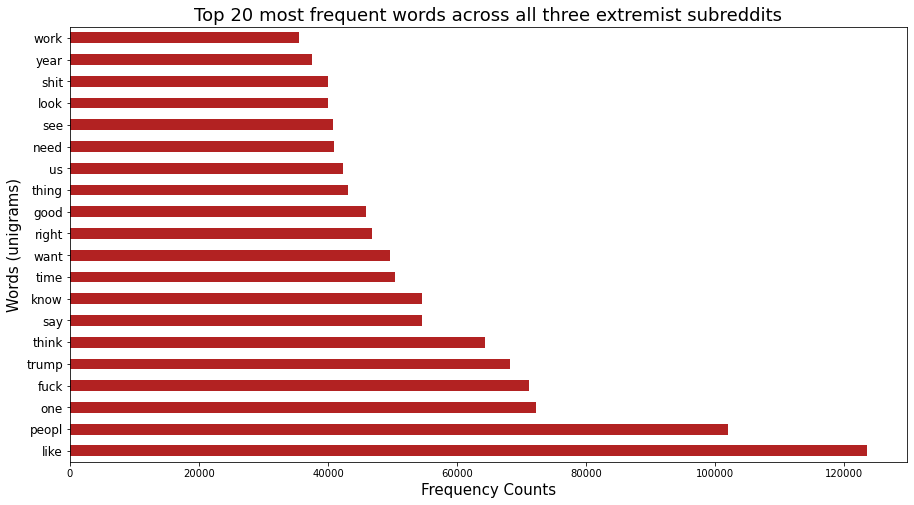

In [72]:
plt.figure(figsize=(15, 8))
extrem_full_cvc_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='firebrick')
plt.title('Top 20 most frequent words across all three extremist subreddits', fontsize = 18)
plt.xlabel('Frequency Counts', fontsize = 15)
plt.ylabel('Words (unigrams)', fontsize = 15)
plt.yticks(fontsize = 12);

## Get the most frequent words by each subreddit:

In [61]:
extrem['subreddit'].value_counts()

The_Donald        713662
ChapoTrapHouse    317318
TheRedPill         10145
Name: subreddit, dtype: int64

In [62]:
extrem['subreddit'].value_counts(normalize=True)

The_Donald        0.685472
ChapoTrapHouse    0.304784
TheRedPill        0.009744
Name: subreddit, dtype: float64

In [63]:
# break the cleaned posts from each subreddit into their own df-

donald_content = donald['clean_content']

In [65]:
redpill_content = redpill['clean_content']

In [67]:
CTH_content = CTH['clean_content']

In [68]:
donald_content_cvc = cvec_stopped.fit_transform(donald_content)

In [69]:
donald_content_cvc_df = pd.DataFrame(donald_content_cvc.toarray(), columns = cvec_stopped.get_feature_names_out())

## Top twenty most frequent words in the The_Donald subreddit:

In [70]:
donald_content_cvc_df.sum().nlargest(20)

like     75696
peopl    61380
trump    60909
one      46841
think    39696
fuck     37385
know     36906
say      35159
want     33582
time     33340
right    29744
need     28948
see      28308
look     28234
us       27850
good     26643
year     26415
thing    26342
vote     24014
shit     22684
dtype: int64

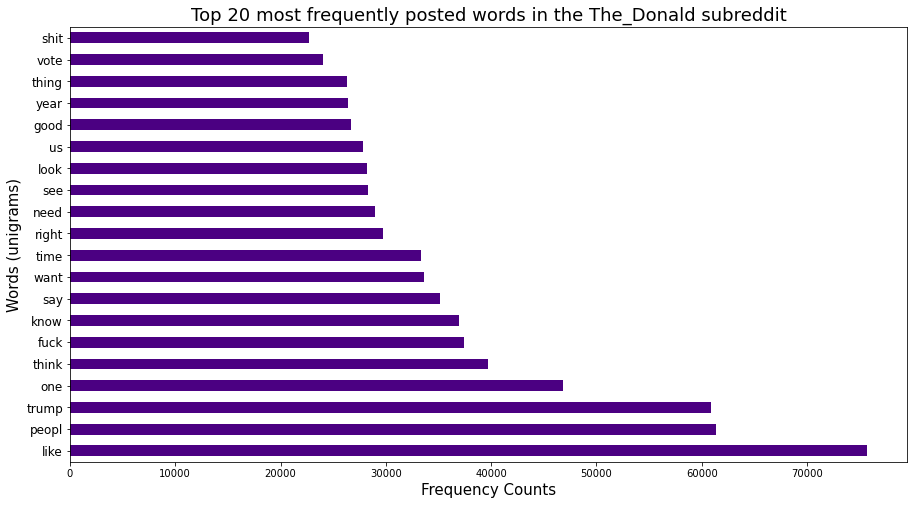

In [71]:
plt.figure(figsize=(15, 8))
donald_content_cvc_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='indigo')
plt.title('Top 20 most frequently posted words in the The_Donald subreddit', fontsize = 18)
plt.xlabel('Frequency Counts', fontsize = 15)
plt.ylabel('Words (unigrams)', fontsize = 15)
plt.yticks(fontsize = 12);

## So the most frequent words in the The_Donald subreddit overlap with the overall most frequent words across the three extremist subreddits, which makes sense since The_Donald is the largest proportion of the extremist subreddits. 

In [73]:
redpill_content_cvc = cvec_stopped.fit_transform(redpill_content)

In [74]:
redpill_content_cvc_df = pd.DataFrame(redpill_content_cvc.toarray(), columns = cvec_stopped.get_feature_names_out())

## Top twenty most frequent words in the TheRedPill subreddit:

In [75]:
redpill_content_cvc_df.sum().nlargest(20)

like     3418
women    3073
fuck     2059
want     2000
one      1985
time     1945
girl     1944
peopl    1728
men      1685
think    1656
guy      1653
know     1529
thing    1482
good     1451
work     1369
life     1368
say      1354
way      1285
look     1197
need     1185
dtype: int64

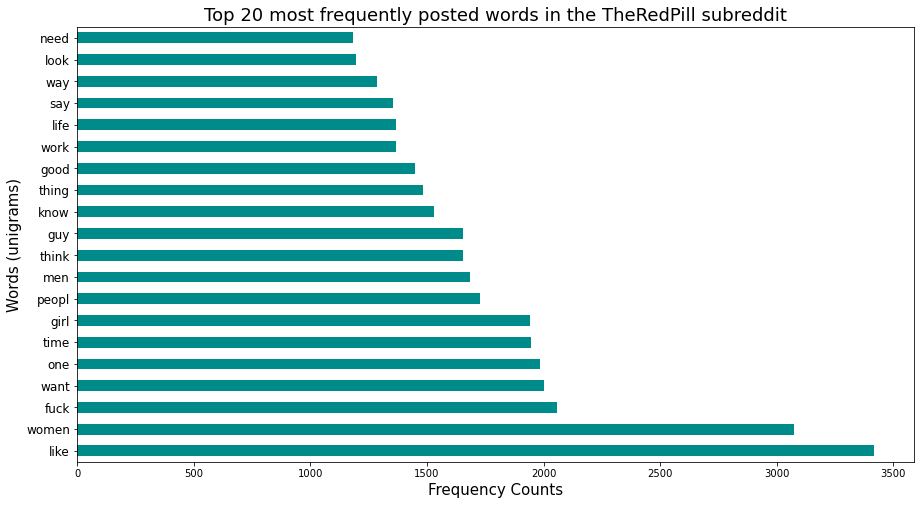

In [76]:
plt.figure(figsize=(15, 8))
redpill_content_cvc_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='darkcyan')
plt.title('Top 20 most frequently posted words in the TheRedPill subreddit', fontsize = 18)
plt.xlabel('Frequency Counts', fontsize = 15)
plt.ylabel('Words (unigrams)', fontsize = 15)
plt.yticks(fontsize = 12);

In [77]:
CTH_content_cvc = cvec_stopped.fit_transform(CTH_content)

In [78]:
CTH_content_cvc_df = pd.DataFrame(CTH_content_cvc.toarray(), columns = cvec_stopped.get_feature_names_out())

## Top twenty most frequent words in the ChapoTrapHouse subreddit:

In [79]:
CTH_content_cvc_df.sum().nlargest(20)

like      44400
peopl     38823
fuck      31623
one       23321
think     23028
say       18100
good      17820
right     16233
shit      16146
know      16128
thing     15325
time      15128
actual    14157
want      14031
us        13921
work      13778
realli    13604
mean      11819
way       11748
see       11415
dtype: int64

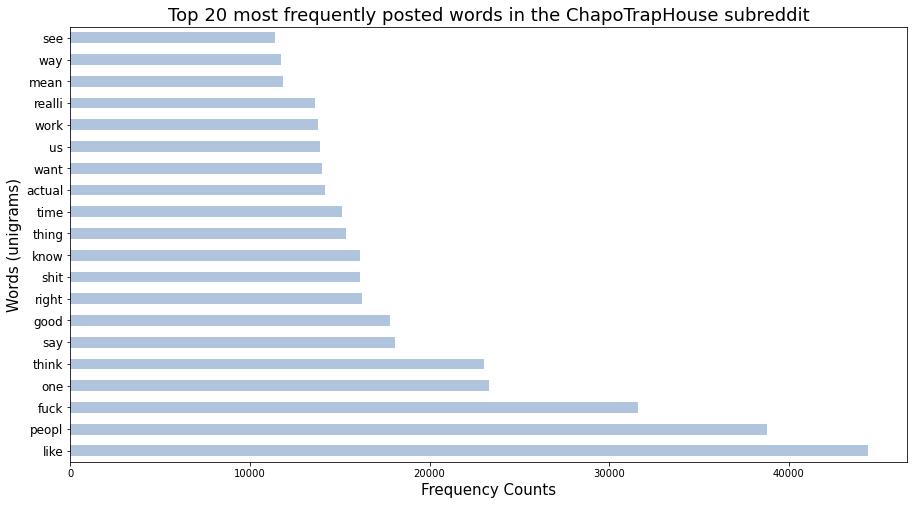

In [80]:
plt.figure(figsize=(15, 8))
CTH_content_cvc_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='lightsteelblue')
plt.title('Top 20 most frequently posted words in the ChapoTrapHouse subreddit', fontsize = 18)
plt.xlabel('Frequency Counts', fontsize = 15)
plt.ylabel('Words (unigrams)', fontsize = 15)
plt.yticks(fontsize = 12);

## Use Spacy to identify and pull out the adjectives in each post of the extremist dataset, in order to get counts for each subreddit, as well as to create a column of adjectives for each post to be used in subsequent classification models:

In [2]:
import spacy
from spacy.matcher import Matcher

In [3]:
nlp = spacy.load("en_core_web_lg")

## Import the dataset to be used for classification modeling, comprised of 20_000 observations from extremist subreddits and 20_000 observation from the politics subreddit:

In [5]:
data = pd.read_csv('data/subreddits.csv')

In [6]:
data.isna().sum()

body               0
subreddit          0
word_count         0
tokenized        275
clean_content    275
extreme            0
dtype: int64

## Drop the null values created from saving and re-importing to/from csv (from the NLP processing in the previous notebook, as discussed above):

In [7]:
data.dropna(inplace=True)

In [8]:
data.isna().sum()

body             0
subreddit        0
word_count       0
tokenized        0
clean_content    0
extreme          0
dtype: int64

## Create a subset of the dataset for classification modeling, of only the extremist posts (the full reddit dataset of extremist posts is too large to run the Spacy matching function across, so I'm running it across this sample to get an approximation of adjective counts):

In [54]:
data_extrem = data.loc[data['extreme'] == 1]

In [55]:
data_extrem.shape

(19812, 6)

In [56]:
data_extrem.columns

Index(['body', 'subreddit', 'word_count', 'tokenized', 'clean_content',
       'extreme'],
      dtype='object')

## Join the text of all the rows in the dataset (from the 'tokenized' column) together into one string:

In [57]:
text_list = ', '.join(data_extrem['tokenized']) 

## Create a function that goes through the text string and returns a dictionary listing each adjective and the number of times it occurs:

In [58]:
def count_adjectives(content):
    matcher = Matcher(nlp.vocab)
    patterns = [
        [{'POS':'ADJ'}],  # look for all adjective POS types
    ]
    matcher.add('placeholder', patterns)  # 'placeholder' is there bc add() requires 2 args, not sure what else to put there
    
    doc = nlp(content)
    matches = matcher(doc)
    adj_list = []
    
    # go thru the row and ID all adjectives-
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # string representation
        span = doc[start:end]  # matched span
        # append the adjectives to the adj_list to be counted, below-
        adj_list.append(span.text)  
        
    # create an empty dictionary for our adjective count-
    adj_count = {}

    # add all IDed adjectives to the dictionary with a count of how many times they appear-
    for adj in range(len(adj_list)):
        adj_count[adj_list[adj]] = adj_list.count(
            adj_list[adj]
            )

    return adj_count

# from:
# https://stackoverflow.com/questions/66790591/spacy-extraction-of-an-adjective-that-precede-a-verb-and-isnt-a-stop-word-nor
# https://medium.com/swlh/create-a-dictionary-from-a-list-65742246ab4b

## Run the text string list through the function, returning the dictionary as a variable:

In [60]:
text_adjs = count_adjectives(text_list)

## Create a function that sorts the dictionary and returns a list of adjectives that occur more than 10 times, and each adjective's number of occurences:

In [ ]:
def adj_sort(dict_to_sort):
    adj_list = []
    
    for key, value in sorted(dict_to_sort.items(), key=lambda x: x[1], reverse = True):
        if value >=10:
            adj_list.append([key, value])

    return adj_list

# from Sean McNamara, Q5 answers

In [148]:
sorted_adj_list = adj_sort(text_adjs)
sorted_adj_list

[['good', 443],
 ['bad', 234],
 ['fucking', 216],
 ['many', 215],
 ['right', 192],
 ['white', 178],
 ['much', 166],
 ['great', 146],
 ['big', 137],
 ['real', 132],
 ['political', 130],
 ['little', 126],
 ['first', 123],
 ['american', 121],
 ['old', 121],
 ['new', 118],
 ['sure', 116],
 ['better', 112],
 ['true', 109],
 ['last', 108],
 ['wrong', 105],
 ['best', 101],
 ['black', 101],
 ['free', 94],
 ['fake', 94],
 ['whole', 87],
 ['full', 84],
 ['liberal', 83],
 ['long', 83],
 ['leftist', 79],
 ['high', 79],
 ['least', 76],
 ['social', 75],
 ['funny', 74],
 ['different', 70],
 ['enough', 65],
 ['actual', 65],
 ['public', 65],
 ['next', 64],
 ['red', 63],
 ['top', 62],
 ['stupid', 62],
 ['non', 61],
 ['nice', 60],
 ['military', 59],
 ['anti', 59],
 ['possible', 57],
 ['rich', 56],
 ['single', 56],
 ['racist', 56],
 ['conservative', 55],
 ['entire', 54],
 ['human', 53],
 ['crazy', 52],
 ['poor', 51],
 ['open', 50],
 ['dumb', 50],
 ['important', 50],
 ['chinese', 49],
 ['western', 48],
 ['

In [ ]:
# output the adjective list to a csv-

sorted_adj_list.to_csv('./data/adjectives.csv', index=False)

In [61]:
adj_list = pd.read_csv('data/adjectives.csv')

In [62]:
adj_list

,adjectives
0,"[['good', 443],"
1,"['bad', 234],"
2,"['fucking', 216],"
3,"['many', 215],"
4,"['right', 192],"
...,...
358,"['incredible', 10],"
359,"['lucky', 10],"
360,"['extreme', 10],"
361,"['temporary', 10],"


In [66]:
# perform some cleaning, removing punctuation from the adjectives column-

# adj_list['adjectives'] = adj_list['adjectives'].str.replace('[', '')
# adj_list['adjectives'] = adj_list['adjectives'].str.replace(']', '')
# adj_list['adjectives'] = adj_list['adjectives'].str.replace("'", '')
# adj_list['adjectives'] = adj_list['adjectives'].str.replace(',', '')

In [68]:
# split the content of the adjectives column, on the space, into two columns (adjectives in one and their count in the other)-

adj_list = adj_list['adjectives'].str.split(' ', expand=True)

In [69]:
adj_list

,0,1
0,good,443
1,bad,234
2,fucking,216
3,many,215
4,right,192
...,...,...
358,incredible,10
359,lucky,10
360,extreme,10
361,temporary,10


In [70]:
# rename the columns-

adj_list.rename(columns={0: 'adjective', 1: 'count'}, inplace=True)

In [71]:
# re-type the count column as a float-

adj_list['count']=adj_list['count'].astype(float)

In [72]:
adj_list

,adjective,count
0,good,443.0
1,bad,234.0
2,fucking,216.0
3,many,215.0
4,right,192.0
...,...,...
358,incredible,10.0
359,lucky,10.0
360,extreme,10.0
361,temporary,10.0


In [73]:
adj_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adjective  363 non-null    object 
 1   count      363 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [74]:
# the top 30 most frequently occurring adjectives in the extremist dataset-

adj_list.head(30)

,adjective,count
0,good,443.0
1,bad,234.0
2,fucking,216.0
3,many,215.0
4,right,192.0
5,white,178.0
6,much,166.0
7,great,146.0
8,big,137.0
9,real,132.0


## Create another function that creates a new column listing each adjective in the associated content for the row, for use in subsequent modeling:

In [9]:
def count_adjectives2(content):
    matcher = Matcher(nlp.vocab)
    patterns = [
        [{'POS':'ADJ'}],  # look for all adjective POS types
    ]
    matcher.add('placeholder', patterns)  # 'placeholder' is there bc add() requires 2 args, not sure what else to put there
    
    doc = nlp(content)
    matches = matcher(doc)
    adj_list = []
    
    # go thru the row and ID all adjectives-
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # string representation
        span = doc[start:end]  # matched span
        # append the adjectives to the adj_list to be counted, below-
        adj_list.append(span.text)  

    return adj_list

# from:
# https://stackoverflow.com/questions/66790591/spacy-extraction-of-an-adjective-that-precede-a-verb-and-isnt-a-stop-word-nor
# https://medium.com/swlh/create-a-dictionary-from-a-list-65742246ab4b

In [54]:
# create a test set to check the code before running it across the entire df-

test = data.tail()

In [53]:
test

,body,subreddit,word_count,tokenized,clean_content,extreme
39995,">Haha, yeah, I'm sure you're -really- influent...",ChapoTrapHouse,341,haha yeah i'm sure really influential stark ra...,haha yeah i'm sure realli influenti stark rave...,1
39996,Woah I didn't know that! That does sound kind...,politics,15,woah know sound kinda sound like potential pro...,woah know sound kinda sound like potenti problem,0
39997,They don't actually care about Manning other t...,ChapoTrapHouse,26,actually care manning use argument even call a...,actual care man use argument even call acciden...,1
39998,"I don't see anyone talking about shooting, exc...",politics,10,see anyone talking shooting except,see anyon talk shoot except,0
39999,Lib,ChapoTrapHouse,1,lib,lib,1


In [55]:
# run the test df across the count_adjectives2 function, above, to check that it works-

test['adjectives'] = test['tokenized'].map(count_adjectives2)

In [56]:
test

,body,subreddit,word_count,tokenized,clean_content,extreme,adjectives
39995,">Haha, yeah, I'm sure you're -really- influent...",ChapoTrapHouse,341,haha yeah i'm sure really influential stark ra...,haha yeah i'm sure realli influenti stark rave...,1,"[sure, influential, stark, mad, communist, big..."
39996,Woah I didn't know that! That does sound kind...,politics,15,woah know sound kinda sound like potential pro...,woah know sound kinda sound like potenti problem,0,"[sound, potential]"
39997,They don't actually care about Manning other t...,ChapoTrapHouse,26,actually care manning use argument even call a...,actual care man use argument even call acciden...,1,[]
39998,"I don't see anyone talking about shooting, exc...",politics,10,see anyone talking shooting except,see anyon talk shoot except,0,[]
39999,Lib,ChapoTrapHouse,1,lib,lib,1,[]


In [57]:
# 'de-listify' the text in the adjectives column, creating a new column of strings-

test['adj_string'] = [' '.join(map(str, l)) for l in test['adjectives']]

In [58]:
test

,body,subreddit,word_count,tokenized,clean_content,extreme,adjectives,adj_string
39995,">Haha, yeah, I'm sure you're -really- influent...",ChapoTrapHouse,341,haha yeah i'm sure really influential stark ra...,haha yeah i'm sure realli influenti stark rave...,1,"[sure, influential, stark, mad, communist, big...",sure influential stark mad communist big speak...
39996,Woah I didn't know that! That does sound kind...,politics,15,woah know sound kinda sound like potential pro...,woah know sound kinda sound like potenti problem,0,"[sound, potential]",sound potential
39997,They don't actually care about Manning other t...,ChapoTrapHouse,26,actually care manning use argument even call a...,actual care man use argument even call acciden...,1,[],
39998,"I don't see anyone talking about shooting, exc...",politics,10,see anyone talking shooting except,see anyon talk shoot except,0,[],
39999,Lib,ChapoTrapHouse,1,lib,lib,1,[],


In [33]:
# run the adjective list function across the entire modeling dataset (the data to be modeled in the next notebook- 
# 20_000 extremist and 20_000 non-extremist posts)-

data['adjectives'] = data['tokenized'].map(count_adjectives2)

In [39]:
data

,body,subreddit,word_count,tokenized,clean_content,extreme,adjectives
0,- Official slogan of Pepsi,politics,5,official slogan pepsi,offici slogan pepsi,0,[official]
1,"""took"" should be ""freed""",ChapoTrapHouse,4,took freed,took freed,1,[]
2,Will tribes be completely free speech?,TheRedPill,6,tribes completely free speech,tribe complet free speech,1,[free]
3,Not an accident. They have crowned their queen...,The_Donald,25,accident crowned queen already warren others g...,accid crown queen alreadi warren other get pla...,1,[]
4,Fucking love this man,The_Donald,4,fucking love man,fuck love man,1,[fucking]
...,...,...,...,...,...,...,...
39995,">Haha, yeah, I'm sure you're -really- influent...",ChapoTrapHouse,341,haha yeah i'm sure really influential stark ra...,haha yeah i'm sure realli influenti stark rave...,1,"[sure, influential, stark, mad, communist, big..."
39996,Woah I didn't know that! That does sound kind...,politics,15,woah know sound kinda sound like potential pro...,woah know sound kinda sound like potenti problem,0,"[sound, potential]"
39997,They don't actually care about Manning other t...,ChapoTrapHouse,26,actually care manning use argument even call a...,actual care man use argument even call acciden...,1,[]
39998,"I don't see anyone talking about shooting, exc...",politics,10,see anyone talking shooting except,see anyon talk shoot except,0,[]


In [47]:
# run the code to create a new column of adjective strings from the lists-

data['adj_string'] = [' '.join(map(str, l)) for l in data['adjectives']]

In [59]:
data

,body,subreddit,word_count,tokenized,clean_content,extreme,adjectives,adj_string
0,- Official slogan of Pepsi,politics,5,official slogan pepsi,offici slogan pepsi,0,[official],official
1,"""took"" should be ""freed""",ChapoTrapHouse,4,took freed,took freed,1,[],
2,Will tribes be completely free speech?,TheRedPill,6,tribes completely free speech,tribe complet free speech,1,[free],free
3,Not an accident. They have crowned their queen...,The_Donald,25,accident crowned queen already warren others g...,accid crown queen alreadi warren other get pla...,1,[],
4,Fucking love this man,The_Donald,4,fucking love man,fuck love man,1,[fucking],fucking
...,...,...,...,...,...,...,...,...
39995,">Haha, yeah, I'm sure you're -really- influent...",ChapoTrapHouse,341,haha yeah i'm sure really influential stark ra...,haha yeah i'm sure realli influenti stark rave...,1,"[sure, influential, stark, mad, communist, big...",sure influential stark mad communist big speak...
39996,Woah I didn't know that! That does sound kind...,politics,15,woah know sound kinda sound like potential pro...,woah know sound kinda sound like potenti problem,0,"[sound, potential]",sound potential
39997,They don't actually care about Manning other t...,ChapoTrapHouse,26,actually care manning use argument even call a...,actual care man use argument even call acciden...,1,[],
39998,"I don't see anyone talking about shooting, exc...",politics,10,see anyone talking shooting except,see anyon talk shoot except,0,[],


In [60]:
# save to csv for modeling in the next notebook-

data.to_csv('./data/subs_to_model.csv', index=False)